In [210]:
%pylab inline
from scipy import linalg

Populating the interactive namespace from numpy and matplotlib


/home/yaevon/anaconda3/envs/py37/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['ma', 'linalg']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [211]:
import math as ma

0.0

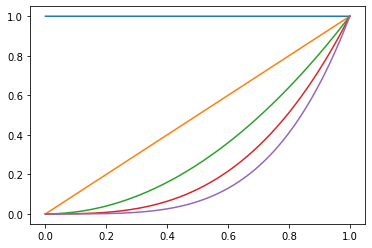

In [212]:
n = 5
m = 2**10+1

# n equispaced points between 0 and 1; samples
x_sample = linspace(0, 1, n)

# m equispaced points between 0 and 1
x_plot = linspace(0, 1, m)

#trivial basis:
#x_plot**i makes the first rows all 1s; to obtain a proper matrix, transpose
basis_trivial_plot = array([x_plot**i for i in range(n)]).T
_ = plot(x_plot, basis_trivial_plot)

x_sample[0]
x_plot[0]

In [213]:
def u(x):
  """Runge function"""
  return 1.0 / (1 + 50 * (x - .5)**2)
ui = u(x_sample)

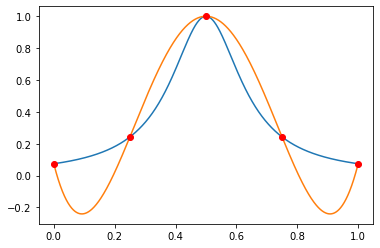

In [214]:
#trivial basis:
#vandermonde on sample points
V = array([x_sample**i for i in range(n)]).T

#weights of trivial basis
P = linalg.solve(V, ui)

#blue
_ = plot(x_plot, u(x_plot))
#orange
_ = plot(x_plot, basis_trivial_plot.dot(P))
_ = plot(x_sample, ui, 'or')

In [235]:
#Lagrange basis:
def l(x, i):
    return prod([(x-xj)/(x_sample[i]-xj) for j, xj in enumerate(x_sample) if i != j])

basis_lagr_plot = zeros((m, n))
for i in range(m):
    for j in range(n):
        basis_lagr_plot[i, j] = l(x_plot[i], j)

basis_lagr_plot2 = ones((m, n))
for i in range(n):
    for j in range(n):
        if i == j:
            continue
            
        basis_lagr_plot2[:, i] *= (x_plot - x_sample[j])/(x_sample[i] - x_sample[j])
#basis_lagr_plot2 = array([prod([(x_plot - x_sample)/(xi - x_sample[]) for i, xi in enumerate(x_sample) ])


tmp = array([(x_plot - x_sample[j]) for j in range(n)])
#print(shape(prod(tmp[list(range(0, 0)), :], axis=0)))
tmp2 = array([(x_plot - x_sample[j]) for j in range(n)])

#basis_lagr_plot3 = array([prod(tmp[[j for j in range(n) if j != i], :], axis=0) for i in range(n)]).T
#basis_lagr_plot3 = array([prod(tmp[[j for j in range(n) if j != i], :], axis=1) for i in range(n)]).T
#basis_lagr_plot3 /= array([prod([x_sample[i] - x_sample[j for j in range(n) if j != i], :], axis=1) for i in range(n)]).T
#print(shape(basis_lagr_plot3))
        
#_ = plot(x_plot, basis_lagr_plot)
#_ = plot(x_plot, basis_lagr_plot2)
#_ = plot(x_plot, basis_lagr_plot3)
#_ = plot(x_sample, 0 * x_sample, 'or')

#_ = plot(x_plot, tmp.T)


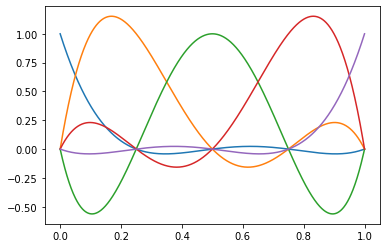

In [223]:
_ = plot(x_plot, basis_lagr_plot)

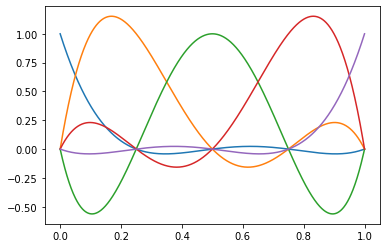

In [225]:
_ = plot(x_plot, basis_lagr_plot2)

In [216]:
a = sin(x_plot)

b = array([prod(a[range(i, m, i+1)]) for i in range(3)])

b

array([0.00000000e+000, 1.51175726e-235, 1.13438500e-156])

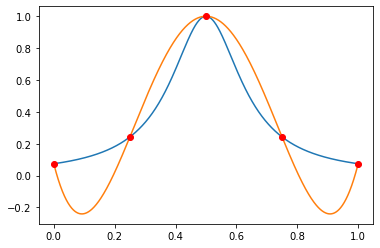

In [236]:

#vandermonde on sample points
#V = array([prod((x_plot-x_sample[j])/(x_sample[i]-x_sample[j]) for i in range(m) for j in range(n))]).T
V = zeros((n, n))
V = array([[l(x_sample[i], j) for j in range(n)] for i in range(n)])

#weights of trivial basis
P = linalg.solve(V, ui)

#blue
_ = plot(x_plot, u(x_plot))
#orange
_ = plot(x_plot, basis_lagr_plot.dot(P))
_ = plot(x_sample, ui, 'or')

In [238]:
tuple(i for i in range(10))

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)